# Трансформер 2 - Улица Сезам.

> Обсудим популярные архитектуры нейронных сетей, основанные на архитектуре Трансформер.

## Hugging Face

https://huggingface.co/

## Модели

https://huggingface.co/models

In [1]:
# ! pip3 install datasets transformers

In [2]:
import torch
import torch.nn as nn
import numpy as np

from warnings import filterwarnings

filterwarnings('ignore')

In [3]:
from transformers import AutoTokenizer
from transformers import BertModel  # https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertModel
from transformers import RobertaModel  # https://huggingface.co/docs/transformers/model_doc/roberta#transformers.RobertaModel
from transformers import DistilBertModel  # https://huggingface.co/docs/transformers/model_doc/distilbert#transformers.DistilBertModel


def get_model(model_name):
    assert model_name in ['bert', 'roberta', 'distilbert']
    
    checkpoint_names = {
        'bert': 'bert-base-cased',  # https://huggingface.co/bert-base-cased
        'roberta': 'roberta-base',  # https://huggingface.co/roberta-base
        'distilbert': 'distilbert-base-cased'  # https://huggingface.co/distilbert-base-cased
    }
    
    model_classes = {
        'bert': BertModel,
        'roberta': RobertaModel,
        'distilbert': DistilBertModel
    }
    
    return AutoTokenizer.from_pretrained(checkpoint_names[model_name]), model_classes[model_name].from_pretrained(checkpoint_names[model_name])

In [4]:
tokenizer, model = get_model('bert')

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [5]:
tokenizer

PreTrainedTokenizerFast(name_or_path='bert-base-cased', vocab_size=28996, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [6]:
encoding = tokenizer.encode_plus('Hello!', add_special_tokens=True, return_token_type_ids=False, return_tensors='pt')

encoding

{'input_ids': tensor([[ 101, 8667,  106,  102]]), 'attention_mask': tensor([[1, 1, 1, 1]])}

In [7]:
tokenizer.decode(encoding['input_ids'][0])

'[CLS] Hello! [SEP]'

In [8]:
output = model(**encoding)

output

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 0.6283,  0.2166,  0.5605,  ...,  0.0136,  0.6158, -0.1712],
         [ 0.6108, -0.2253,  0.9263,  ..., -0.3028,  0.4500, -0.0714],
         [ 0.8040,  0.1809,  0.7076,  ..., -0.0685,  0.4837, -0.0774],
         [ 1.3290,  0.2360,  0.4567,  ...,  0.1509,  0.9621, -0.4841]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-0.7105,  0.4876,  0.9999, -0.9947,  0.9599,  0.9521,  0.9767, -0.9946,
         -0.9815, -0.6238,  0.9776,  0.9984, -0.9989, -0.9998,  0.8559, -0.9755,
          0.9895, -0.5281, -1.0000, -0.7414, -0.7056, -0.9999,  0.2901,  0.9786,
          0.9729,  0.0734,  0.9828,  1.0000,  0.8981, -0.1109,  0.2780, -0.9920,
          0.8693, -0.9985,  0.1461,  0.2067,  0.8092, -0.2430,  0.8580, -0.9585,
         -0.8130, -0.6138,  0.7961, -0.5727,  0.9737,  0.2362, -0.1194, -0.0789,
          0.0031,  0.9997, -0.9519,  0.9899, -0.9962,  0.9931,  0.9950,  0.5050,
          0.9952,  0.1090,

In [9]:
output.last_hidden_state.shape

torch.Size([1, 4, 768])

In [10]:
output.pooler_output.shape

torch.Size([1, 768])

In [11]:
tokenizer, model = get_model('roberta')

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [12]:
tokenizer

PreTrainedTokenizerFast(name_or_path='roberta-base', vocab_size=50265, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False)})

In [13]:
encoding = tokenizer.encode_plus('Hello!', add_special_tokens=True, return_token_type_ids=False, return_tensors='pt')

encoding

{'input_ids': tensor([[    0, 31414,   328,     2]]), 'attention_mask': tensor([[1, 1, 1, 1]])}

In [14]:
tokenizer.decode(encoding['input_ids'][0])

'<s>Hello!</s>'

In [15]:
output = model(**encoding)

output

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.0632,  0.0918, -0.0026,  ..., -0.0642, -0.0555,  0.0080],
         [-0.2026, -0.0124,  0.0174,  ..., -0.0176,  0.0094,  0.0870],
         [-0.1557, -0.1340,  0.2350,  ..., -0.0798, -0.1061,  0.5419],
         [-0.0534,  0.0986, -0.0293,  ..., -0.1175, -0.0659, -0.0090]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[ 1.0118e-02, -2.2553e-01, -2.2348e-01, -8.2207e-02,  1.1413e-01,
          2.0735e-01,  2.7447e-01, -8.3260e-02, -6.2361e-02, -1.7518e-01,
          2.1636e-01, -2.5967e-02, -9.4576e-02,  9.4474e-02, -1.3591e-01,
          4.9016e-01,  2.1106e-01, -4.6220e-01,  5.0345e-02, -2.3451e-02,
         -2.5763e-01,  8.7108e-02,  4.7654e-01,  3.5332e-01,  1.1738e-01,
          4.8578e-02, -1.3495e-01,  5.9986e-04,  1.8758e-01,  2.3595e-01,
          2.9100e-01,  6.5356e-02,  7.7346e-02,  2.3497e-01, -2.4440e-01,
          5.0584e-02, -3.1700e-01,  2.3022e-02,  2.6311e-01, -1.9050e-01,
 

In [16]:
output.last_hidden_state.shape

torch.Size([1, 4, 768])

In [17]:
output.pooler_output.shape

torch.Size([1, 768])

In [18]:
tokenizer, model = get_model('distilbert')

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [19]:
tokenizer

PreTrainedTokenizerFast(name_or_path='distilbert-base-cased', vocab_size=28996, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [20]:
encoding = tokenizer.encode_plus('Hello!', add_special_tokens=True, return_token_type_ids=False, return_tensors='pt')

encoding

{'input_ids': tensor([[ 101, 8667,  106,  102]]), 'attention_mask': tensor([[1, 1, 1, 1]])}

In [21]:
tokenizer.decode(encoding['input_ids'][0])

'[CLS] Hello! [SEP]'

In [22]:
output = model(**encoding)

output

BaseModelOutput(last_hidden_state=tensor([[[ 0.3344,  0.2363,  0.1612,  ...,  0.1000,  0.2444, -0.0667],
         [ 0.1081,  0.3777,  0.4785,  ...,  0.3207,  0.6012,  0.1848],
         [ 0.6096,  0.5275,  0.6734,  ...,  0.3253,  0.1565,  0.1588],
         [ 0.5685,  0.6846,  0.5774,  ...,  0.8333,  0.9534, -0.0596]]],
       grad_fn=<NativeLayerNormBackward0>), hidden_states=None, attentions=None)

In [23]:
output.last_hidden_state.shape

torch.Size([1, 4, 768])

## Датасеты

https://huggingface.co/datasets

In [24]:
from datasets import load_dataset

dataset = load_dataset("imdb")

Reusing dataset imdb (/home/nuke/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1)


  0%|          | 0/3 [00:00<?, ?it/s]

In [25]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [26]:
dataset['train']

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [27]:
dataset['train'][0]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [28]:
def tokenization(example):
    return tokenizer.batch_encode_plus(example['text'], add_special_tokens=True, return_token_type_ids=False, truncation=True)


train_dataset = dataset['train'].map(tokenization, batched=True)
test_dataset = dataset['test'].map(tokenization, batched=True)

Loading cached processed dataset at /home/nuke/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1/cache-7f4aff406a9b0307.arrow
Loading cached processed dataset at /home/nuke/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1/cache-6474a3e62c044d9c.arrow


In [29]:
train_dataset[0].keys()

dict_keys(['text', 'label', 'input_ids', 'attention_mask'])

In [30]:
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

In [31]:
train_dataset[0]

{'label': tensor(0),
 'input_ids': tensor([  101,   146, 12765,   146,  6586,   140, 19556, 19368, 13329,   118,
           162, 21678,  2162, 17056,  1121,  1139,  1888,  2984,  1272,  1104,
          1155,  1103,  6392,  1115,  4405,  1122,  1165,  1122,  1108,  1148,
          1308,  1107,  2573,   119,   146,  1145,  1767,  1115,  1120,  1148,
          1122,  1108,  7842,  1118,   158,   119,   156,   119, 10148,  1191,
          1122,  1518,  1793,  1106,  3873,  1142,  1583,   117,  3335,  1217,
           170,  5442,  1104,  2441,  1737,   107,  6241,   107,   146,  1541,
          1125,  1106,  1267,  1142,  1111,  1991,   119,   133,  9304,   120,
           135,   133,  9304,   120,   135,  1109,  4928,  1110,  8663,  1213,
           170,  1685,  3619,  3362,  2377,  1417, 14960,  1150,  3349,  1106,
          3858,  1917,  1131,  1169,  1164,  1297,   119,  1130,  2440,  1131,
          3349,  1106,  2817,  1123,  2209,  1116,  1106,  1543,  1199,  3271,
          1104,  4

In [32]:
from transformers import DataCollatorWithPadding


data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [33]:
from torch.utils.data import DataLoader


train_loader = DataLoader(train_dataset, batch_size=32, collate_fn=data_collator, pin_memory=True, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, collate_fn=data_collator, pin_memory=True, shuffle=True)

In [34]:
b = next(iter(train_loader))

In [35]:
b

{'input_ids': tensor([[  101,  1188,  2523,  ...,     0,     0,     0],
        [  101,   146,  1821,  ...,     0,     0,     0],
        [  101,   107,  1130,  ...,     0,     0,     0],
        ...,
        [  101,   146,  1125,  ...,     0,     0,     0],
        [  101,   146,  1486,  ...,     0,     0,     0],
        [  101,   107, 16983,  ...,   107,   186,   102]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'labels': tensor([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0])}

In [36]:
from transformers import AutoTokenizer
from transformers import BertForSequenceClassification  # https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertForSequenceClassification
from transformers import RobertaForSequenceClassification  # https://huggingface.co/docs/transformers/model_doc/roberta#transformers.RobertaForSequenceClassification
from transformers import DistilBertForSequenceClassification  # https://huggingface.co/docs/transformers/model_doc/distilbert#transformers.DistilBertForSequenceClassification


def get_model_sc(model_name):
    assert model_name in ['bert', 'roberta', 'distilbert']
    
    checkpoint_names = {
        'bert': 'bert-base-cased',  # https://huggingface.co/bert-base-cased
        'roberta': 'roberta-base',  # https://huggingface.co/roberta-base
        'distilbert': 'distilbert-base-cased'  # https://huggingface.co/distilbert-base-cased
    }

    model_classes = {
        'bert': BertForSequenceClassification,
        'roberta': RobertaForSequenceClassification,
        'distilbert': DistilBertForSequenceClassification
    }

    return AutoTokenizer.from_pretrained(checkpoint_names[model_name]), model_classes[model_name].from_pretrained(checkpoint_names[model_name], num_labels=2)

In [37]:
tokenizer, model = get_model_sc('distilbert')

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['pre_classifier.bias', 'classifier.weight', 'pre_classifier

In [38]:
model(**b)

SequenceClassifierOutput(loss=tensor(0.6987, grad_fn=<NllLossBackward0>), logits=tensor([[0.0452, 0.0540],
        [0.0545, 0.0579],
        [0.0277, 0.0625],
        [0.0276, 0.0564],
        [0.0271, 0.0789],
        [0.0444, 0.0486],
        [0.0442, 0.0593],
        [0.0433, 0.0452],
        [0.0192, 0.0913],
        [0.0372, 0.0493],
        [0.0187, 0.0786],
        [0.0313, 0.0747],
        [0.0394, 0.0653],
        [0.0279, 0.0364],
        [0.0492, 0.0493],
        [0.0158, 0.0543],
        [0.0362, 0.0716],
        [0.0227, 0.0705],
        [0.0369, 0.0252],
        [0.0395, 0.0528],
        [0.0077, 0.0670],
        [0.0293, 0.0706],
        [0.0516, 0.0712],
        [0.0172, 0.0759],
        [0.0355, 0.0705],
        [0.0411, 0.0532],
        [0.0197, 0.0468],
        [0.0829, 0.0699],
        [0.0330, 0.0370],
        [0.0008, 0.0673],
        [0.0497, 0.0485],
        [0.0501, 0.0747]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

## Обучение (не будем запускать)

In [39]:
from datasets import load_metric


metric = load_metric("accuracy")


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [40]:
from transformers import TrainingArguments
from transformers import Trainer


training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    evaluation_strategy="epoch"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 25000
  Num Epochs = 5
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 7815


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

In [41]:
del training_args
del trainer
del model

In [42]:
torch.cuda.empty_cache()

## Альтернативный вариант

In [43]:
tokenizer, model = get_model('distilbert')

loading configuration file https://huggingface.co/distilbert-base-cased/resolve/main/config.json from cache at /home/nuke/.cache/huggingface/transformers/ebe1ea24d11aa664488b8de5b21e33989008ca78f207d4e30ec6350b693f073f.302bfd1b5e031cc1b17796e0b6e5b242ba2045d31d00f97589e12b458ebff27a
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-cased",
  "activation": "gelu",
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.21.1",
  "vocab_size": 28996
}

loading file https://huggingface.co/distilbert-base-cased/resolve/main/vocab.txt from cache at /home/nuke/.cache/huggingface/transformers/ba377304984dc63e3ede0e23a938bbbf04d5c3835b66d5bb48343aec

In [44]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)
print(torch.cuda.get_device_name())

cuda:0
NVIDIA GeForce RTX 3090 Ti


In [45]:
model = model.to(device)

In [46]:
def tokenization(example):
    return tokenizer.batch_encode_plus(example['text'], add_special_tokens=True, return_token_type_ids=False, truncation=True)


train_dataset = dataset['train'].map(tokenization, batched=True)
test_dataset = dataset['test'].map(tokenization, batched=True)

train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

train_loader = DataLoader(train_dataset, batch_size=64, collate_fn=data_collator, pin_memory=True, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, collate_fn=data_collator, pin_memory=True, shuffle=False)

  0%|          | 0/25 [00:00<?, ?ba/s]

  0%|          | 0/25 [00:00<?, ?ba/s]

In [47]:
from tqdm import tqdm


@torch.inference_mode()
def get_embeddings_labels(model, loader):
    model.eval()
    
    total_embeddings = []
    labels = []
    
    for batch in tqdm(loader):
        labels.append(batch['labels'].unsqueeze(1))

        batch = {key: batch[key].to(device) for key in ['attention_mask', 'input_ids']}

        embeddings = model(**batch)['last_hidden_state'][:, 0, :]

        total_embeddings.append(embeddings.cpu())

    return torch.cat(total_embeddings, dim=0), torch.cat(labels, dim=0).to(torch.float32)

In [48]:
train_embeddings, train_labels = get_embeddings_labels(model, train_loader)

100%|███████████████████████████████████████████████████| 391/391 [01:30<00:00,  4.34it/s]


In [49]:
test_embeddings, test_labels = get_embeddings_labels(model, test_loader)

100%|███████████████████████████████████████████████████| 391/391 [01:28<00:00,  4.44it/s]


In [50]:
train_embeddings.shape, train_labels.shape

(torch.Size([25000, 768]), torch.Size([25000, 1]))

In [51]:
test_embeddings.shape, test_labels.shape

(torch.Size([25000, 768]), torch.Size([25000, 1]))

In [52]:
from torch.utils.data import TensorDataset
from torch.utils.data import random_split


dataset = TensorDataset(torch.cat([train_embeddings, test_embeddings], dim=0), torch.cat([train_labels, test_labels], dim=0))

train_dataset, test_dataset = random_split(dataset, (int(len(dataset) * 0.9), len(dataset) - int(len(dataset) * 0.9)))

train_loader = DataLoader(train_dataset, batch_size=128, pin_memory=True, shuffle=True)
valid_loader = DataLoader(test_dataset, batch_size=128, pin_memory=True, shuffle=False)

In [53]:
little_model = nn.Sequential(
    nn.Linear(768, 768),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(768, 1)
)

In [59]:
def binary_accuracy(preds, y):
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc


def train(model):
    model.train()

    train_loss = 0
    train_accuracy = 0

    for x, y in tqdm(train_loader, desc='Train'):
        x, y = x.to(device), y.to(device)

        optimizer.zero_grad()

        output = model(x)

        loss = loss_fn(output, y)

        train_loss += loss.item()
        train_accuracy += binary_accuracy(output, y).cpu()

        loss.backward()

        optimizer.step()

    train_loss /= len(train_loader)
    train_accuracy /= len(train_loader)

    return train_loss, train_accuracy

In [60]:
@torch.inference_mode()
def evaluate(model, loader):
    model.eval()

    total_loss = 0
    total_accuracy = 0

    for x, y in tqdm(loader, desc='Evaluation'):
        x, y = x.to(device), y.to(device)

        output = model(x)

        loss = loss_fn(output, y)

        total_loss += loss.item()
        total_accuracy += binary_accuracy(output, y).cpu()

    total_loss /= len(loader)
    total_accuracy /= len(loader)

    return total_loss, total_accuracy

In [61]:
import matplotlib.pyplot as plt
from IPython.display import clear_output


def plot_stats(
    train_loss: list[float],
    valid_loss: list[float],
    train_accuracy: list[float],
    valid_accuracy: list[float],
    title: str
):
    plt.figure(figsize=(16, 8))

    plt.title(title + ' loss')

    plt.plot(train_loss, label='Train loss')
    plt.plot(valid_loss, label='Valid loss')
    plt.legend()
    plt.grid()

    plt.show()

    plt.figure(figsize=(16, 8))

    plt.title(title + ' accuracy')
    
    plt.plot(train_accuracy, label='Train accuracy')
    plt.plot(valid_accuracy, label='Valid accuracy')
    plt.legend()
    plt.grid()

    plt.show()

In [62]:
def whole_train_valid_cycle(model, num_epochs, title):
    train_loss_history, valid_loss_history = [], []
    train_accuracy_history, valid_accuracy_history = [], []

    for epoch in range(num_epochs):
        train_loss, train_accuracy = train(model)
        valid_loss, valid_accuracy = evaluate(model, valid_loader)

        train_loss_history.append(train_loss)
        valid_loss_history.append(valid_loss)

        train_accuracy_history.append(train_accuracy)
        valid_accuracy_history.append(valid_accuracy)

        clear_output()

        plot_stats(
            train_loss_history, valid_loss_history,
            train_accuracy_history, valid_accuracy_history,
            title
        )

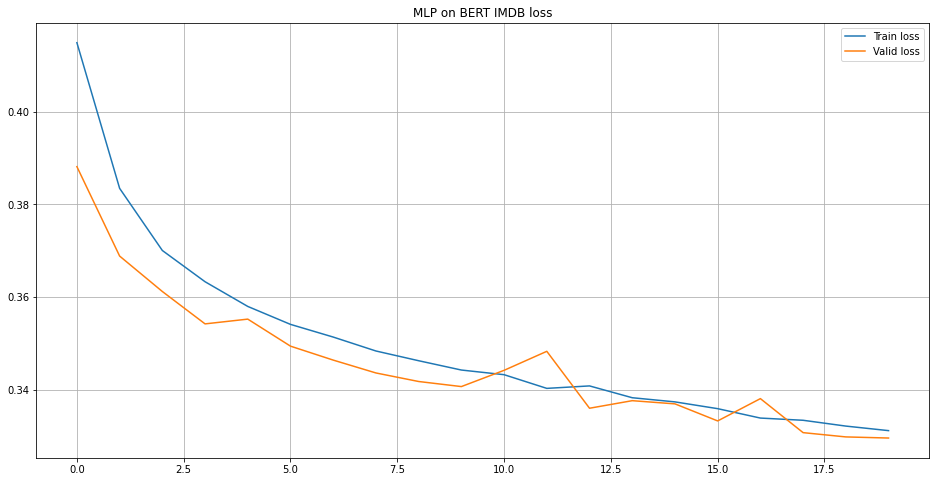

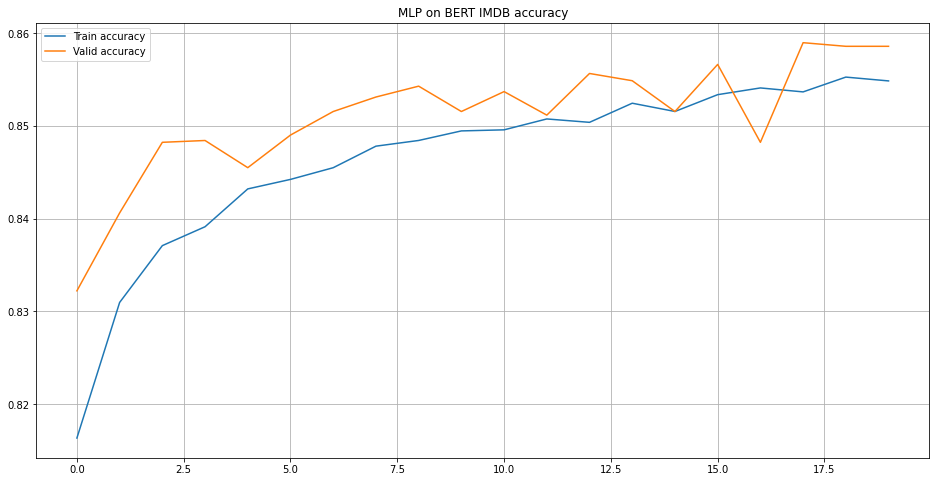

In [63]:
from torch.optim import Adam


little_model = little_model.to(device)

optimizer = Adam(little_model.parameters(), lr=1e-4)
loss_fn = nn.BCEWithLogitsLoss()

whole_train_valid_cycle(little_model, 20, 'MLP on BERT IMDB')